BY: Saumyajyoti Sahoo

This is a case study that focuses on the analysis of video game sales over a period, taking into account the volume of sales by titles, publishers, regions, etc.

The objective of this study is to discover trends in video game sales with respect to genre, publishers & region.

Fields include:

* Rank — Ranking of overall sales
* Name — The games name
* Platform — Platform of the games release (i.e. PC,PS4, etc.)
* Year — Year of the game’s release
* Genre — Genre of the game
* Publisher — Publisher of the game
* NA_Sales — Sales in North America (in millions)
* EU_Sales — Sales in Europe (in millions
* JP_Sales — Sales in Japan (in millions)
* Other_Sales — Sales in the rest of the world (in millions)
* Global_Sales — Total worldwide sales.

The tool used for this analysis is Python, on a Jupyter Notebook IDE. First, we import all the tools required for this study, and import the dataset into Jupyter notebook.

In [36]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df=pd.read_csv("vgsales.csv")
print(df.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Checking for missing values:

Next, we check for missing values, or columns in this dataset. This will improve the accuracy of our analysis.

In [39]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Droping the null values with Dropna function.

In [40]:
df=df.dropna()

Let's see null values are drop or not.

In [41]:
print(df.isnull().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


let' see statistics data with Describe function. 

In [42]:
print(df.describe())

               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16291.000000  16291.000000  16291.000000  16291.000000  16291.000000   
mean    8290.190228   2006.405561      0.265647      0.147731      0.078833   
std     4792.654450      5.832412      0.822432      0.509303      0.311879   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4132.500000   2003.000000      0.000000      0.000000      0.000000   
50%     8292.000000   2007.000000      0.080000      0.020000      0.000000   
75%    12439.500000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16291.000000  16291.000000  
mean       0.048426      0.540910  
std        0.190083      1.567345  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.480000  


1. WHICH GAMES RECORDED THE MOST SALES IN 2006 & 2009?
First, we’re required to find what games recorded the most sales for each year, 2006 & 2009. We’ll aim to view the top five(5) for each year.

i. 2006

In [43]:
twosix=df[df.Year==2006]
twosix=twosix.sort_values('Global_Sales',ascending=False).head(5)
twosix

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
100,101,The Legend of Zelda: Twilight Princess,Wii,2006.0,Action,Nintendo,3.83,2.19,0.60,0.70,7.31


For visualization purposes, I’ll present this in a bar chart.

In [44]:
figure=px.bar(twosix,x='Name',y='Global_Sales',
             title="Best selling games in 2006")
figure.show()

From this chart, the best selling game in 2006 by a landslide was ‘Wii Sports’ with over 80M copies in sales, followed by ‘New Super Mario Bros’ with 30M copies. It was a great year for Wii, with ‘Wii Play’ coming in third place.

ii. 2009

In [45]:
twonine=df[df.Year==2009]
twonine=twonine.sort_values('Global_Sales',ascending=False).head(5)
twonine

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
36,37,Call of Duty: Modern Warfare 2,X360,2009.0,Shooter,Activision,8.52,3.63,0.08,1.29,13.51
45,46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009.0,Action,Nintendo,4.40,2.77,3.96,0.77,11.90


In [46]:
figure=px.bar(twonine,x='Name',y='Global_Sales',
             title="Best selling games in 2006")
figure.show()

From this chart, ‘Wii Sports Resort’ holds the number one spot in 2009, with over 30M copies sold, with ‘New Super Mario Bros. Wii’ racking about 28M copies sold and claiming the second spot.

2. WHAT ARE THE BEST PERFORMING GENRES?
Next, we’ll find out which genres rack up the most sales over this period. Looking for the top five:

In [47]:
genre=df.groupby('Genre').sum()['Global_Sales'].reset_index()
genre=genre.sort_values('Global_Sales',ascending=False).head(5)
genre

,Genre,Global_Sales
0,Action,1722.84
10,Sports,1309.24
8,Shooter,1026.20
7,Role-Playing,923.83
4,Platform,829.13


In [48]:
figure4=px.bar(genre,x='Genre',y='Global_Sales',
              title="Best performing genre")
figure4.show()

Action games are the most popular games among users in this time period, with over 1.7 Billion copies of action games sold globally. This is followed by sports in second place with 1.3 Billion copies and shooter games in third place with just over 1 Billion copies.

3. WHAT ARE THE BEST PERFORMING PLATFORMS?

In [49]:
platform=df.groupby('Platform').sum()['Global_Sales'].reset_index()
platform=platform.sort_values('Global_Sales',ascending=False).head(5)
platform

,Platform,Global_Sales
16,PS2,1233.46
28,X360,969.60
17,PS3,949.35
26,Wii,909.81
4,DS,818.91


In [50]:
figure2=px.bar(platform,x='Platform',y='Global_Sales',
              title="Platforms with most sales")
figure2.show()

The second release in the ‘PlayStation’ franchise, ‘PS2’ recorded most copies purchased with over 1.2 Billion copies, followed by Microsoft’s Xbox 360 in second place with over 900 Million copies.

4. WHO ARE THE BEST PERFORMING PUBLISHERS?

Publishers have a great influence on sales, as customers relate to publishers based on their track history and reputation. Using our dataset, we’ll find out the best performing publishers over this period.

In [51]:
publisher=df.groupby('Publisher').sum()['Global_Sales'].reset_index()
publisher=publisher.sort_values('Global_Sales',ascending=False).head(5)
publisher

,Publisher,Global_Sales
359,Nintendo,1784.43
138,Electronic Arts,1093.39
21,Activision,721.41
455,Sony Computer Entertainment,607.28
524,Ubisoft,473.54


In [52]:
figure13=px.bar(publisher,x='Publisher',y='Global_Sales',
              title="Best performing publisher")
figure13.show()

Nintendo holds the top spot for number of copies sold among popular publishers with over 1.7 Billion copies sold. This is followed by Electronic Arts (EA) with just over 1.1 Billion copies in second place, and Activision in third place with over 700 Million.

5. WHO ARE THE BEST PUBLISHERS IN DIFFERENT REGIONS?

Next, we find out how these publishers perform in different regions, with North America, Europe and Japan as our major areas of focus.

In [53]:
pubreg=df.groupby('Publisher').agg({'JP_Sales':'sum','EU_Sales':'sum','NA_Sales':'sum','Other_Sales':'sum'})
pubreg=pubreg.sort_values('NA_Sales',ascending=False).head(3)
pubreg

,JP_Sales,EU_Sales,NA_Sales,Other_Sales
Publisher,,,,
Nintendo,454.99,418.30,815.75,95.19
Electronic Arts,13.98,367.38,584.22,127.63
Activision,6.54,213.72,426.01,74.79


For better visualization, I’ll use a grouped bar chart to show comparisons.

Text(0.5, 1.0, 'Video Game Sales Per Region from Publishers')

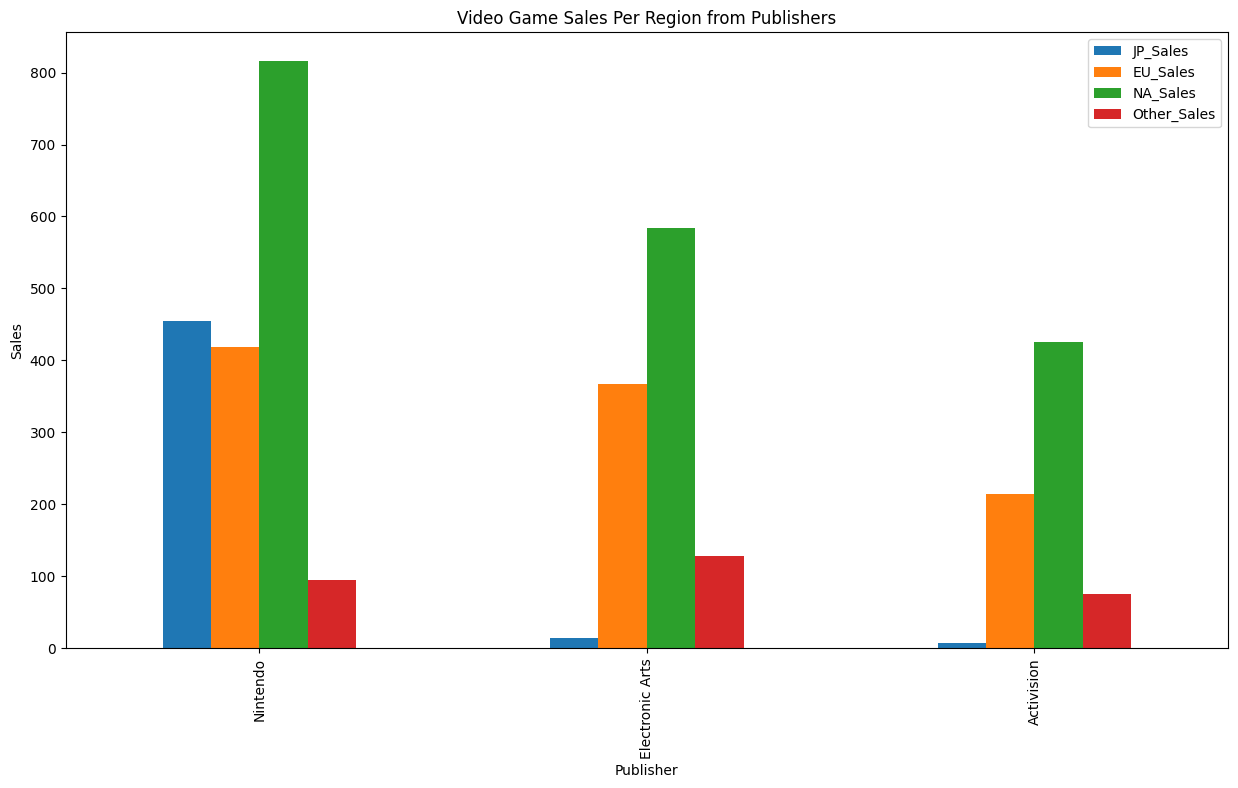

In [54]:
pubreg.plot(kind='bar',figsize=(15,8))
plt.xlabel('Publisher')
plt.ylabel('Sales')
plt.title('Video Game Sales Per Region from Publishers')

From the chart above, the majority of sales are recorded in North America, from the top three publishers, Nintendo, EA and Activision respectively.

6. BEST PERFORMING PLATFORMS IN DIFFERENT REGIONS?

Lastly, we determine how each of our popular gaming platforms perform in these regions.

In [55]:
platreg=df.groupby('Platform').agg({'JP_Sales':'sum','EU_Sales':'sum','NA_Sales':'sum','Other_Sales':'sum'})
platreg=platreg.sort_values('NA_Sales',ascending=False).head(5)
platreg

,JP_Sales,EU_Sales,NA_Sales,Other_Sales
Platform,,,,
X360,12.30,278.00,594.33,84.67
PS2,137.54,332.63,572.92,190.47
Wii,68.28,264.35,497.37,79.20
PS3,79.21,340.47,388.90,140.81
DS,175.02,194.05,388.53,60.29


Text(0.5, 1.0, 'Best Performing Platforms in Regions')

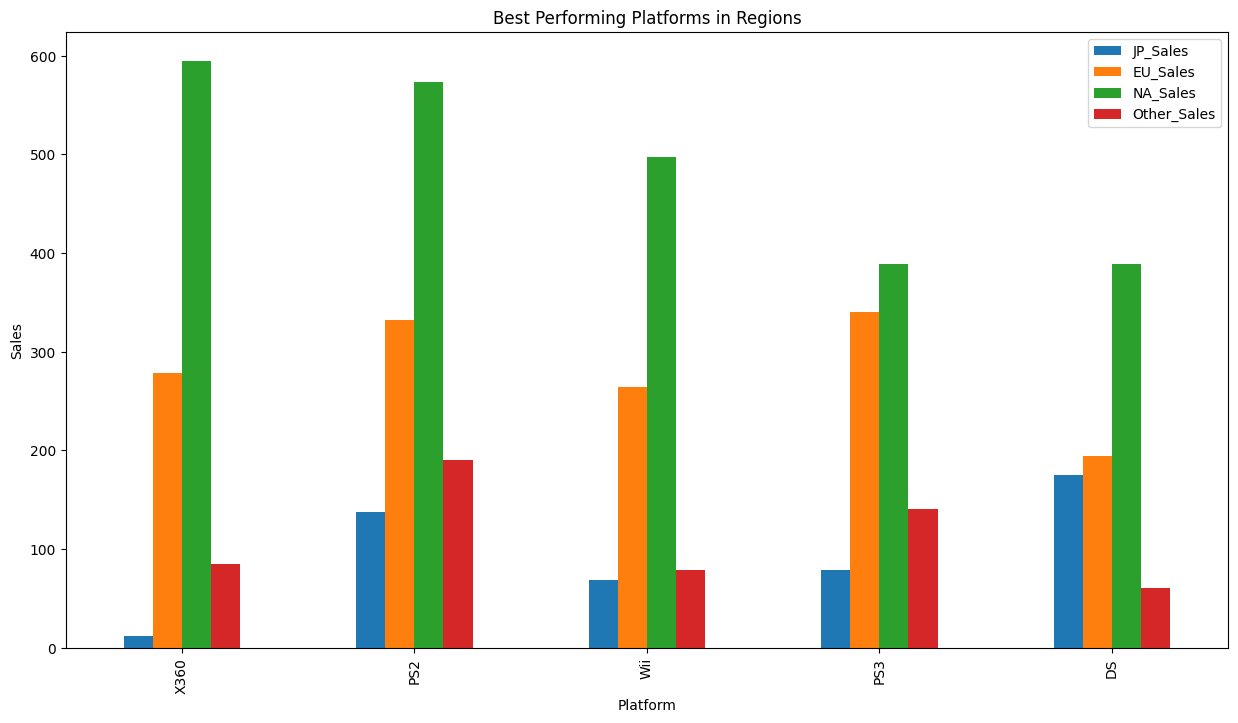

In [56]:
platreg.plot(kind='bar',figsize=(15,8))
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.title('Best Performing Platforms in Regions')


Xbox 360 leads the pack for the most successful platform in North America, with games racking over 600 Million copies in sales. This is closely followed by PS2 with just over 580 Million copies. Nintendo’s DS rack up the most sales in Japan, in comparison with other popular platforms.

In this end we analyze which regional sales is dominated in this data set. 

In [57]:
regional_sales = [df.NA_Sales.sum(),df.EU_Sales.sum(),df.JP_Sales.sum(),df.Other_Sales.sum()]
regions = ['NA','EU','JP','Others']
explode = (0.02,0.02,0.02,0.02)

For better visualization, I’ll use a pie chart to show comparisons.

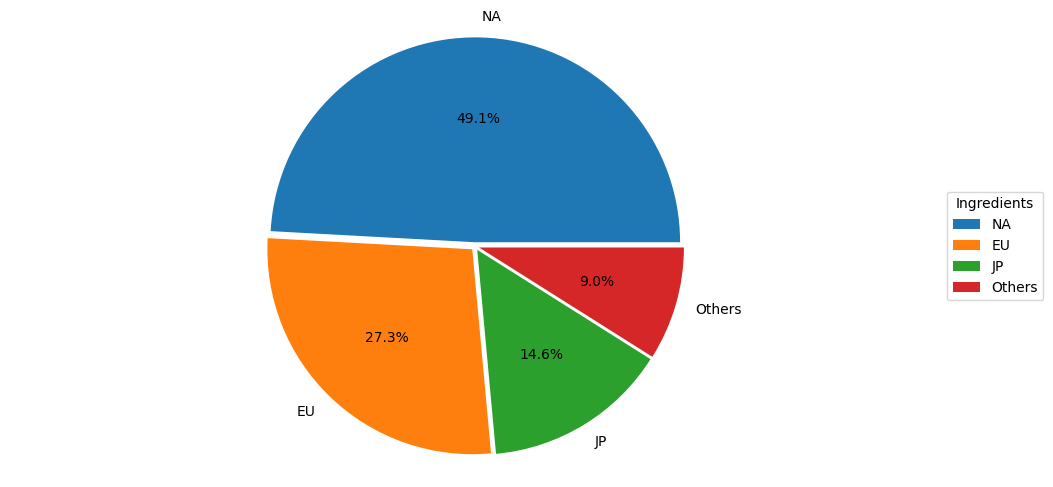

In [58]:
plt.figure(figsize=(12,6))
plt.pie(regional_sales,explode = explode,labels=regions,autopct='%1.1f%%')
plt.axis('equal')
plt.legend(regions,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


ANALYSIS:

1. Nintendo racks up a higher count of sales in Japan in comparison to other publishers. This might be due to marketing proximity, as they have their headquarters in Kyoto, Japan. Despite this however, Nintendo still ranks top for sales in other parts of the world.

2. Action games are the most popular gaming genre.

3. Wii Sports, released in 2006 is the best selling game of all time. It’s success is arguably due to it’s release time during the 2006 Winter Olympics, and it being the first-of-its-kind concept in the ‘sports’ genre.

4. Video game sales/ success is highly dependent on its success in North America.

I hope my contribution is help to see my skills and perfect matched to your Data Analyst role. I hopr you considr to me. Thank You.